<a href="https://colab.research.google.com/github/vishilp/dsbmed205/blob/main/PS1/ps1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

matrix = np.loadtxt('/content/ps1.genos')
snp0 = matrix[:,0]
phenotypes = np.loadtxt('/content/ps1.phenos')

In [2]:
correlation, p_value = stats.pearsonr(snp0, phenotypes)
t_statistic1 = 250*(correlation**2)
print(t_statistic1)
#our null remains that there is no correlation between snp0 and phenotype (test statistic should be close to 0)
#now, we permute phenotypes to see if this is true


7.123297230470761


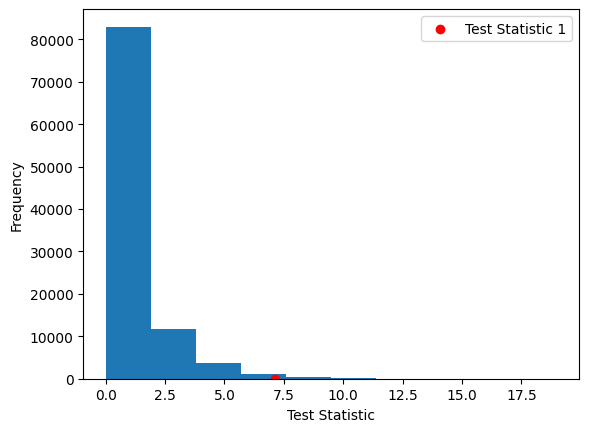

In [3]:
res = np.array([])
for i in range(100000):
  np.random.shuffle(phenotypes)
  corr, p = stats.pearsonr(snp0, phenotypes)
  test_statistic= 250*corr**2
  res = np.append(res, test_statistic)
plt.hist(res)
plt.ylabel("Frequency")
plt.xlabel("Test Statistic")
plt.scatter(t_statistic1, 10, color='red')
plt.legend(['Test Statistic 1'])
plt.show()

In [4]:
p_value = np.sum(res>=t_statistic1)/100000
print(p_value)

0.00741


In [27]:
stats.chi2.pdf(t_statistic1, df=1)

0.004243900494612205

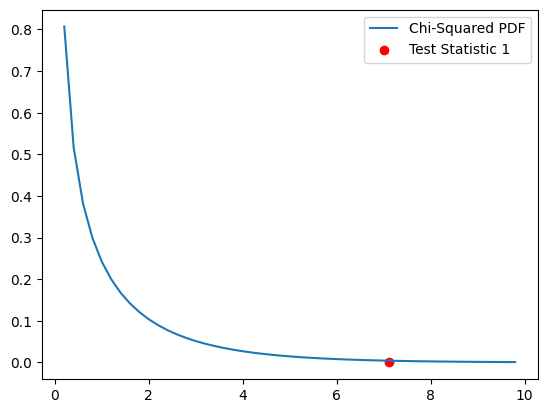

In [31]:
x = np.arange(0, 10, 0.2)
plt.plot(x, stats.chi2.pdf(x, df=1))
plt.scatter(t_statistic1, 0, color='red')
plt.legend(['Chi-Squared PDF', 'Test Statistic 1'])

In [36]:
phenotypes = np.loadtxt('/content/ps1.phenos') #reset phenotype shuffling
test_statistics= []
for i in range(10):
  snp = matrix[:,i]
  correlation, p_value = stats.pearsonr(snp, phenotypes)
  test_statistics.append(250*(correlation**2))

7.123297230470761
0.35208971065563915
3.0564215614821575
4.66610544333577
8.263149848266774
7.123297230470761
0.3450912110090099
6.835652112203335
7.655153677861441
3.8668760822108834


In [38]:
pvals = []
for stat in test_statistics:
  pvals.append(stats.chi2.pdf(stat, df=1))
print(pvals)

[0.004243900494612205, 0.5638039183044833, 0.04950053914757169, 0.0179143423088229, 0.0022285226907854706, 0.004243900494612205, 0.571488521890058, 0.005002384771219, 0.0031378892316150124, 0.02934596978248884]
